## LECTURE 3: ML MODELS

In this lecture we are going to build upon the knowledge of last week. The knowledge of last week is pretty much required for this week's content. 

This week you will learn:
* The difference between supervised and unsupervised ML.
* The difference between regression and classification. 
* How to train supervised and unsupervised ML models.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(123)

## LINEAR REGRESSION

We are going to generate our own data so that it fits the linear regression model. The data are generated as $y = \alpha +\beta X + \epsilon$. In the previous equation, y is the target or the response, $\alpha$ is the intercept, $\beta$ is the slope, $X$ are the features and $\epsilon$ is an error term containing error that add to our data.

In [3]:
def generate_dataset(beta, alpha, std_dev, n):
  np.random.seed(123)
  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.random(n) * 10
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  # Calculate `y` according to the equation discussed
  y = alpha + X * beta + e
  return X, y

Using the function above you can generate data using your own parametrization.

In [4]:
X_linear, y_linear = generate_dataset(beta=-2, alpha=2, n=40, std_dev=10)

In [5]:
linear_df = pd.DataFrame(
    {
    'X' : X_linear,
    'y' : y_linear
    }
)


In [6]:
from sklearn.model_selection import train_test_split

train_linear_df, test_linear_df = train_test_split(linear_df, test_size=0.2, random_state=25)

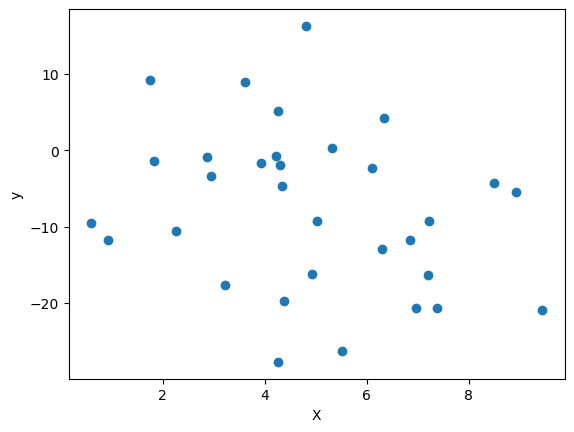

In [7]:
plt.scatter(train_linear_df['X'], train_linear_df['y'])
plt.xlabel('X')
plt.ylabel('y')

plt.show()

Now that we have the data, it is time to use a linear regression model on it! We do so by importing the model from the sklearn library.

In [8]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression(fit_intercept=True).fit(X=train_linear_df['X'].values.reshape(-1, 1), y=train_linear_df['y'])

Our model is supposed to find the parameters that we originally used to generate the data! How hard it is for the model to find these depends on n (the number of data points) but also on the standard deviation that was used to add randomness to the data.

In [9]:
print("The trained model gives us a value of: {} for alpha and a value of: {} for beta.".format(linear_regression_model.intercept_,
linear_regression_model.coef_[0]))

The trained model gives us a value of: -1.5270437438295952 for alpha and a value of: -1.2489434366632464 for beta.


We can now plot a line using the parameters that our linear regression model found to determine visually how close our model is to the data. We will first plot the model on the train data and test on the test data. 

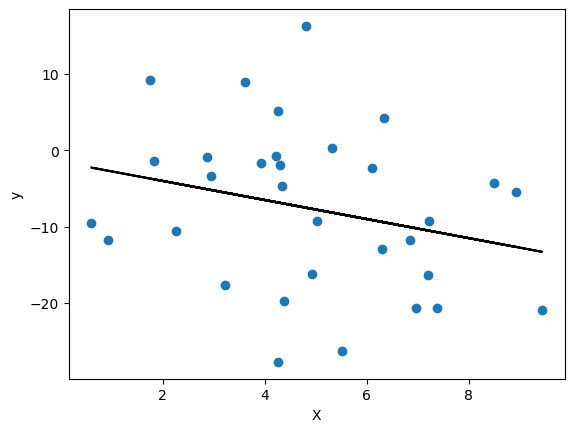

In [10]:
plt.scatter(train_linear_df['X'], train_linear_df['y'])
plt.plot(train_linear_df['X'], linear_regression_model.predict(train_linear_df['X'].values.reshape(-1, 1)), color='k')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

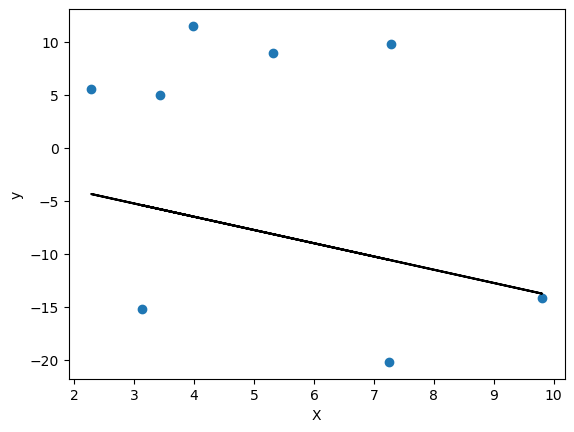

In [11]:
plt.scatter(test_linear_df['X'], test_linear_df['y'])
plt.plot(test_linear_df['X'], linear_regression_model.predict(test_linear_df['X'].values.reshape(-1, 1)), color='k')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

We will now test our model on both the training data and the testing data. For performance assessment we will be using a metric called the "mean-squared-error". This is a metric for regression problems. For now the following intuition will do: the lower the metric, the better.

In [12]:
from sklearn.metrics import mean_squared_error
y_train_true = train_linear_df['y']
y_train_predict = linear_regression_model.predict(train_linear_df['X'].values.reshape(-1, 1))
mean_squared_error(y_train_true, y_train_predict)


102.30728157252369

In [13]:
y_test_true = test_linear_df['y']
y_test_predict = linear_regression_model.predict(test_linear_df['X'].values.reshape(-1, 1))
mean_squared_error(y_test_true, y_test_predict)

179.29650258782547

## LOGISTIC REGRESSION

For logistic regression we sort of stick with the linear data $z = \alpha +\beta X + \epsilon$. On top of it we use another function to map the data to probabilities and then to classes, but the details of it are outside the scope of this lecture.

In [14]:
def generate_dataset_logistic_regression(beta, n, std_dev, alpha):
  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.uniform(-1, 1, n) * 1
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  # Calculate `y` according to the equation discussed
  z = alpha + X * beta + e
  pr = 1/(1+np.exp(-z)) 
  y = pr > 0.5 
  # y = np.random.binomial(200, pr, 200)
  return X, y

Again, play with the parameters to change the generation of the data.

In [63]:
X_logistic, y_logistic = generate_dataset_logistic_regression(beta=100, n=100, std_dev=2, alpha=5)

In [64]:
logistic_df = pd.DataFrame(
    {
    'X' : X_logistic,
    'y' : y_logistic
    }
)


In [65]:
train_logistic_df, test_logistic_df = train_test_split(logistic_df, test_size=0.2, random_state=25)

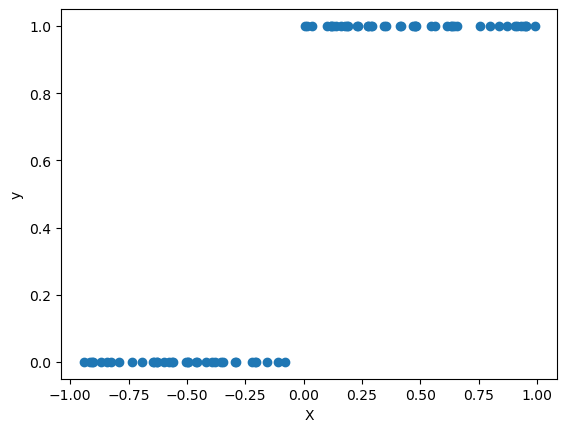

In [67]:
plt.scatter(train_logistic_df['X'], train_logistic_df['y'])
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(fit_intercept=True) \
    .fit(X=train_logistic_df['X'].values.reshape(-1, 1),
         y=train_logistic_df['y'])

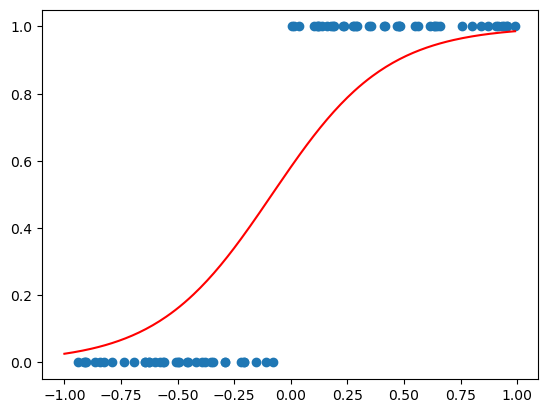

In [69]:
data_to_plot = np.arange(-1, 1, 0.01).reshape(-1, 1)
plt.scatter(train_logistic_df['X'], train_logistic_df['y'])
plt.plot(data_to_plot, logistic_regression_model.predict_proba(data_to_plot)[:,1], linestyle='solid', label='Logistic regr', color='red')    

plt.show()


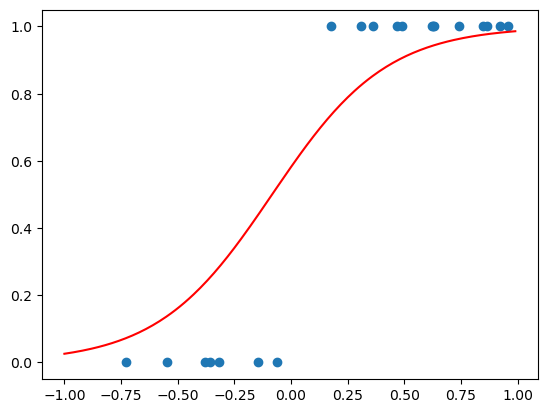

In [70]:
data_to_plot = np.arange(-1, 1, 0.01).reshape(-1, 1)
plt.scatter(test_logistic_df['X'], test_logistic_df['y'])
plt.plot(data_to_plot, logistic_regression_model.predict_proba(data_to_plot)[:,1], linestyle='solid', label='Logistic regr', color='red')    

plt.show()


For classification we cannot use the mean squared error. However, we can use the f1 metric. This metric goes from 0 to 1 and higher means better.

In [71]:
from sklearn.metrics import f1_score
y_train_true = train_logistic_df['y']
y_train_predict = logistic_regression_model.predict(train_logistic_df['X'].values.reshape(-1, 1))
f1_score(y_train_true, y_train_predict)


0.9887640449438202

In [72]:
y_test_true = test_logistic_df['y']
y_test_predict = logistic_regression_model.predict(test_logistic_df['X'].values.reshape(-1, 1))
f1_score(y_test_true, y_test_predict)

0.962962962962963

## CLUSTERING

For Clustering we will not create our own function to generate the data. Instead we will rely on the make_blobs function that is part of sklearn.

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [20]:
features, clusters = make_blobs(n_samples = 2000,
                  n_features = 2, 
                  centers = 5,
                  cluster_std = 2,
                  shuffle = True)

Clustering is an unpervised method. This means thst the data we are looking at does not have a reponse. Instead, to make our problem more interesting, we are using two features. Note that the Y-axis now displays a second feature instead of the response (as was the case for regression and classification).

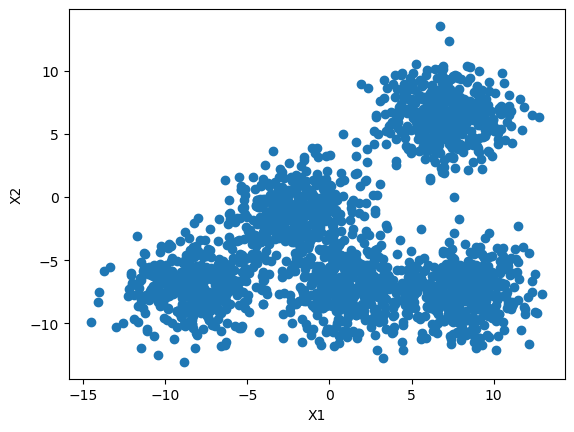

In [73]:
plt.scatter(features[:,0], features[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [22]:
#Initialize the class object
kmeans = KMeans(n_clusters=5)
 
#predict the labels of clusters.
predictions = kmeans.fit_predict(features)

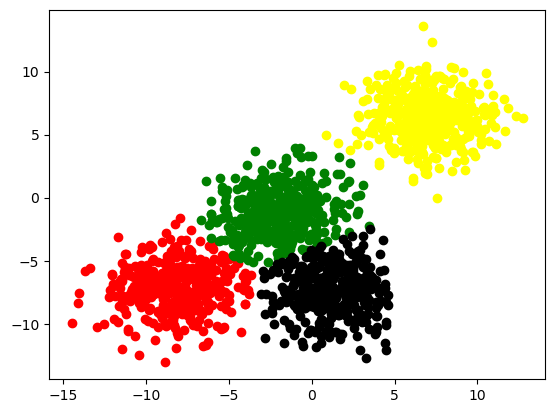

In [23]:
#filter rows of original data
for label, colour in zip(range(4), ['red', 'green', 'yellow', 'black']):
    filtered_label = features[predictions == label]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , color=colour)
plt.show()

Evaluation for clustering is dificult. In contrast with the supervised methods of regression and classification, we do not have ground-true data. 

## EXERCISES

In [24]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest', 'name', 'cabin', 'ticket'], axis=1, inplace=True)

In [25]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,female,25.0000,1.0,2.0,151.5500,S


In [26]:
X.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
round(X.isna().mean() * 100, 1)

pclass       0.0
sex          0.0
age         20.1
sibsp        0.0
parch        0.0
fare         0.1
embarked     0.2
dtype: float64

In [28]:
mask = ~pd.isnull(X[['fare', 'embarked']]).any(1)
X, y = X[mask].reset_index(drop=True), y[mask].reset_index(drop=True)

#X = X.dropna(subset=['fare', 'embarked'])

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
X['sex'] = encoder.fit_transform(X['sex'].values.reshape(-1, 1))
X['embarked'] = encoder.fit_transform(X['embarked'].values.reshape(-1, 1))

In [30]:
X_fit = X.loc[:, X.columns != 'age']
X['age'] = X['age'].fillna(0)

linear_regression_model = LinearRegression(fit_intercept=True).fit(X=X_fit, y=X['age'])

In [31]:
X['age'][X['age'] == 0] = linear_regression_model.predict(X_fit[X['age'] == 0])

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
X['sex'] = encoder.fit_transform(X['sex'].values.reshape(-1, 1))
X['embarked'] = encoder.fit_transform(X['embarked'].values.reshape(-1, 1))

In [33]:
logistic_model = LogisticRegression(fit_intercept=True).fit(X=X, y=y)

/usr/local/Caskroom/miniconda/base/envs/lecture03/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
logistic_model.predict(X)

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)